In [54]:
#Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [21]:
#using tensorflow framework for text classification

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
import matplotlib.pyplot as plt

In [22]:
# Loading mnist data
# Spliting the data into training and testing data

In [4]:
(x_train, y_train),(x_test, y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [23]:
#using matplotlib.pyplot for visualization of x_train[0]
# and checking the corresponding target value in y_train

5

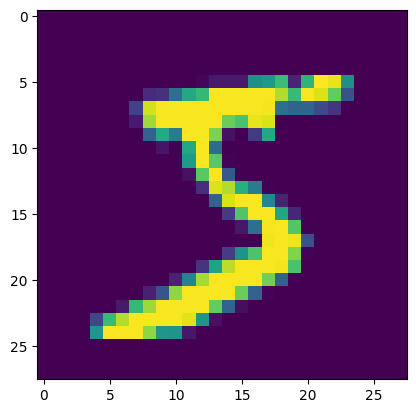

In [9]:
plt.imshow(x_train[0])
y_train[0]

In [24]:
# Each image is 2D array of size (1,28,28) ie 28 rows and 28 fetures(columns)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
# As image pixel ranges from 0 to 255 we need to scale it between 0 to 1

In [11]:
x_train_sc = x_train/255
x_test_sc= x_test/255

In [12]:
x_train_sc[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
#Create a Sequential Model.
# impage is first flattened to make the multidimensional input one-dimensional
# Using relu as activation in hidden layers
# as this is multiclassification problem, I have used softmax as activation function in output layer.

model= Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [34]:
#Created model layers look like this.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
#compiled model using 
#optimizer as adam
#loss as sparse_categorical_crossentropy as there are multiple classes.
#Evaluation metrics as accuracy

In [39]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics= ["accuracy"]
)

In [40]:
# This is last step of model building in which we fit training data an also pass the test data for validation(loss on test data will be evaluated simultaniously)
# As batch size passed is 50, this is example of mini batch stochastic gradient  descent
#Early stoppage is passed in callbacks to avoid over fitting

In [41]:
es= EarlyStopping(monitor="val_loss", patience=4)

In [42]:
history= model.fit(
    x_train_sc, 
    y_train,
    verbose= 1,
    batch_size=100,
    epochs=5,
    validation_data=(x_test_sc,y_test),
    callbacks= [es]

                   )

Epoch 1/5
600/600 [==============================] - 4s 6ms/step - loss: 0.3430 - accuracy: 0.9036 - val_loss: 0.1814 - val_accuracy: 0.9481
Epoch 2/5
600/600 [==============================] - 3s 4ms/step - loss: 0.1535 - accuracy: 0.9554 - val_loss: 0.1340 - val_accuracy: 0.9606
Epoch 3/5
600/600 [==============================] - 2s 4ms/step - loss: 0.1097 - accuracy: 0.9681 - val_loss: 0.1036 - val_accuracy: 0.9685
Epoch 4/5
600/600 [==============================] - 3s 4ms/step - loss: 0.0853 - accuracy: 0.9754 - val_loss: 0.0956 - val_accuracy: 0.9704
Epoch 5/5
600/600 [==============================] - 4s 7ms/step - loss: 0.0682 - accuracy: 0.9805 - val_loss: 0.0949 - val_accuracy: 0.9709


In [46]:
#As seen above accuracy score on training data is 98.05% and on test data is 97.09%
# results are good and can be considered for deployment
# Evaluation is done on test data as follows

In [43]:
model.evaluate(x_test_sc, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0949 - accuracy: 0.9709


[0.09485046565532684, 0.9708999991416931]

In [51]:
# Prediction on testing data is done as follows

In [50]:
model.predict(x_test_sc)

313/313 [==============================] - 1s 2ms/step


array([[9.4779571e-06, 4.4652925e-08, 1.9472848e-04, ..., 9.9591416e-01,
        8.0268946e-06, 3.6715945e-05],
       [7.8037388e-08, 3.3129236e-05, 9.9987942e-01, ..., 1.2857760e-13,
        4.7564086e-07, 2.2247904e-12],
       [1.0781336e-05, 9.9482775e-01, 1.9279058e-03, ..., 1.1226977e-03,
        9.0767519e-04, 2.8011180e-05],
       ...,
       [2.5705322e-09, 1.8495082e-09, 4.0823220e-09, ..., 1.1671915e-05,
        2.4657045e-05, 7.8215793e-04],
       [2.5523632e-06, 6.2717660e-08, 8.6078078e-09, ..., 3.0555189e-08,
        4.3506362e-04, 4.4800579e-08],
       [8.9256105e-08, 4.2728470e-11, 7.0607527e-08, ..., 9.4617109e-12,
        5.0833827e-11, 6.7286357e-11]], dtype=float32)

In [52]:
# Plotting graph between training loss and testing loss through all iterations

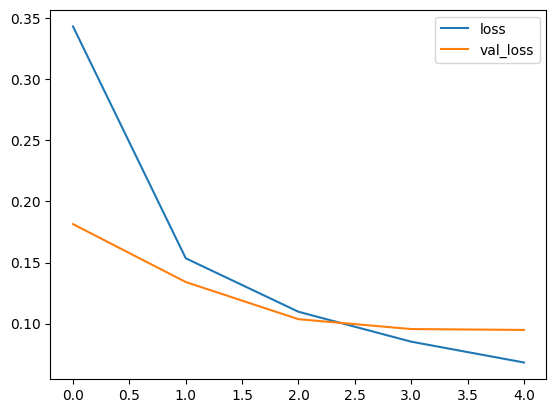

In [47]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

In [53]:
# Plotting graph between training accuracy and testing accuracy through all iterations

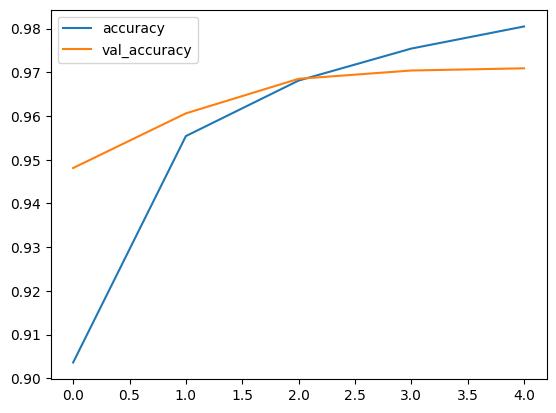

In [48]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()